# FeedForward 🥸

In this notebook we explore the possible use of Multilayer Perceptron Neural Network in this classicification task. We used three different architecture strucutures: a baseline Network with two hidden layers and 1100 hidden neurons and then two variations obtained by doubleing the number of neurons or layers.

### Libriaries

Just import all the usefull libriaries

In [1]:
import utilities as ff
from matplotlib import pyplot as plt
import numpy as np
import pathlib


In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import *
from keras.models import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import *


### Dataset

Set the parameters.

In [3]:
batch_size = 42
img_size = 128
color_mode = "grayscale"
no_classes = 2
seed = 42 #used where?


Divide the dataset between exemples used for hyperparameters tuning and risk estimation.

In [4]:
train, test = ff.ready_to_be_used_dataset(
    batch_size, image_squared_size=img_size, color_mode=color_mode
)


Found 23401 files belonging to 2 classes.
Using 11701 files for training.
Found 23401 files belonging to 2 classes.
Using 11700 files for validation.


Check the total number of examples.

In [5]:
(len(train)+len(test))*batch_size

30744

Compute the number of batches that must be used for training and validating the model in the hyperparameters tuning.

In [6]:
len(train)*0.8

292.8

Divede the training part between training and validation.

In [7]:
train,valid=train.take(223),train.skip(223)

Check the dimension of the data.

In [8]:
image_batch, labels_batch = next(iter(valid))
print(f'Size of a batch of images {image_batch.shape}', f'Size of a bath of labels {labels_batch.shape}')


Size of a batch of images (32, 128, 128, 1) Size of a bath of labels (32,)


### Baseline model

#### Model definition

In [10]:
model = Sequential(
    [
        
        Flatten(input_shape=(img_size, img_size, 1)),
        Dense(1000, activation="sigmoid"),
        Dense(100, activation="sigmoid"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1000)              10001000  
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,101,302
Trainable params: 10,101,302
Non-trainable params: 0
_________________________________________________________________


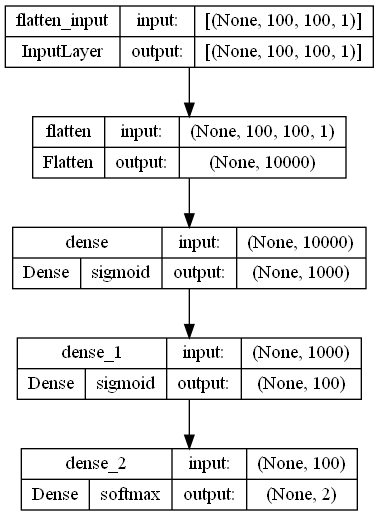

In [11]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [12]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Hyperparameters tuning

In [37]:
history = model.fit(train, validation_data=valid, epochs=20)

Epoch 1/20
223/223 [==============================] - 25s 110ms/step - loss: 0.7368 - accuracy: 0.5050 - val_loss: 0.6987 - val_accuracy: 0.5015
Epoch 2/20
223/223 [==============================] - 26s 117ms/step - loss: 0.6954 - accuracy: 0.4960 - val_loss: 0.6945 - val_accuracy: 0.4989
Epoch 3/20
223/223 [==============================] - 26s 117ms/step - loss: 0.6950 - accuracy: 0.4890 - val_loss: 0.6980 - val_accuracy: 0.5019
Epoch 4/20
223/223 [==============================] - 25s 113ms/step - loss: 0.6947 - accuracy: 0.4984 - val_loss: 0.6970 - val_accuracy: 0.4964
Epoch 5/20
223/223 [==============================] - 24s 107ms/step - loss: 0.6949 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 6/20
223/223 [==============================] - 24s 109ms/step - loss: 0.6948 - accuracy: 0.4963 - val_loss: 0.6959 - val_accuracy: 0.5036
Epoch 7/20
223/223 [==============================] - 24s 108ms/step - loss: 0.6969 - accuracy: 0.4940 - val_loss: 0.6933 - val_ac

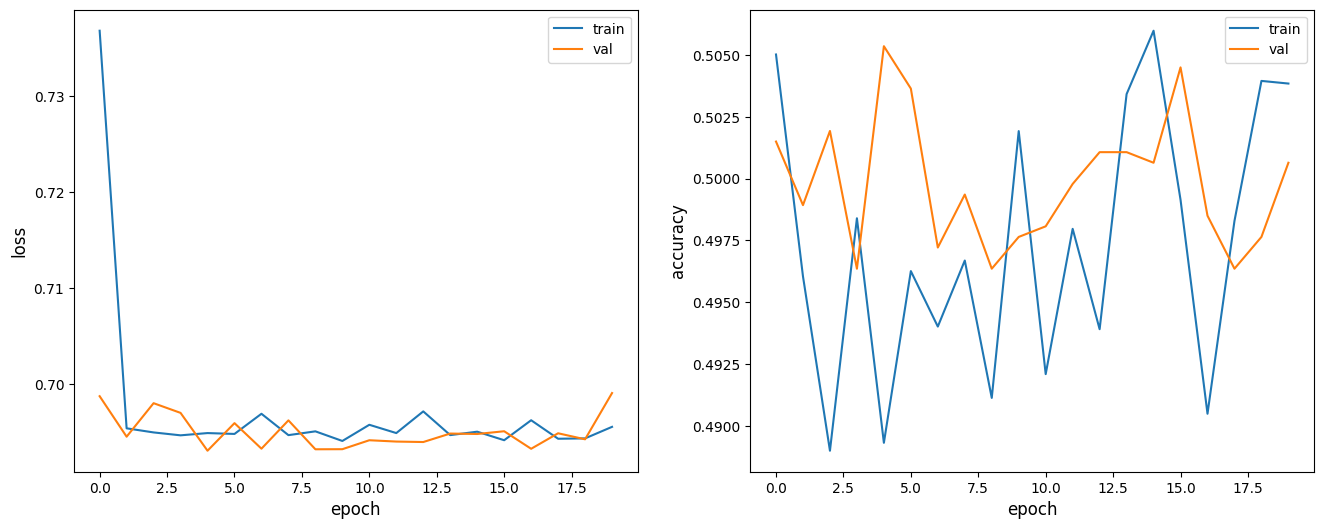

In [38]:
ff.performance_plot(history)

**UNDERFITTING!!** 

Try with another activation function.

In [44]:
model = Sequential(
    [
        
        Flatten(input_shape=(img_size, img_size, 1)),
        Dense(1000, activation="relu"),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [45]:
history = model.fit(train, validation_data=valid, epochs=25)

Epoch 1/25
223/223 [==============================] - 25s 107ms/step - loss: 1.0844 - accuracy: 0.5361 - val_loss: 0.7688 - val_accuracy: 0.5409
Epoch 2/25
223/223 [==============================] - 27s 122ms/step - loss: 0.6968 - accuracy: 0.5650 - val_loss: 0.7234 - val_accuracy: 0.5191
Epoch 3/25
223/223 [==============================] - 26s 117ms/step - loss: 0.6897 - accuracy: 0.5674 - val_loss: 0.6633 - val_accuracy: 0.6094
Epoch 4/25
223/223 [==============================] - 28s 124ms/step - loss: 0.6670 - accuracy: 0.5911 - val_loss: 0.6860 - val_accuracy: 0.5572
Epoch 5/25
223/223 [==============================] - 26s 118ms/step - loss: 0.6633 - accuracy: 0.5993 - val_loss: 0.6585 - val_accuracy: 0.5987
Epoch 6/25
223/223 [==============================] - 26s 118ms/step - loss: 0.6709 - accuracy: 0.5948 - val_loss: 0.7319 - val_accuracy: 0.5041
Epoch 7/25
223/223 [==============================] - 24s 107ms/step - loss: 0.6603 - accuracy: 0.6037 - val_loss: 0.7067 - val_ac

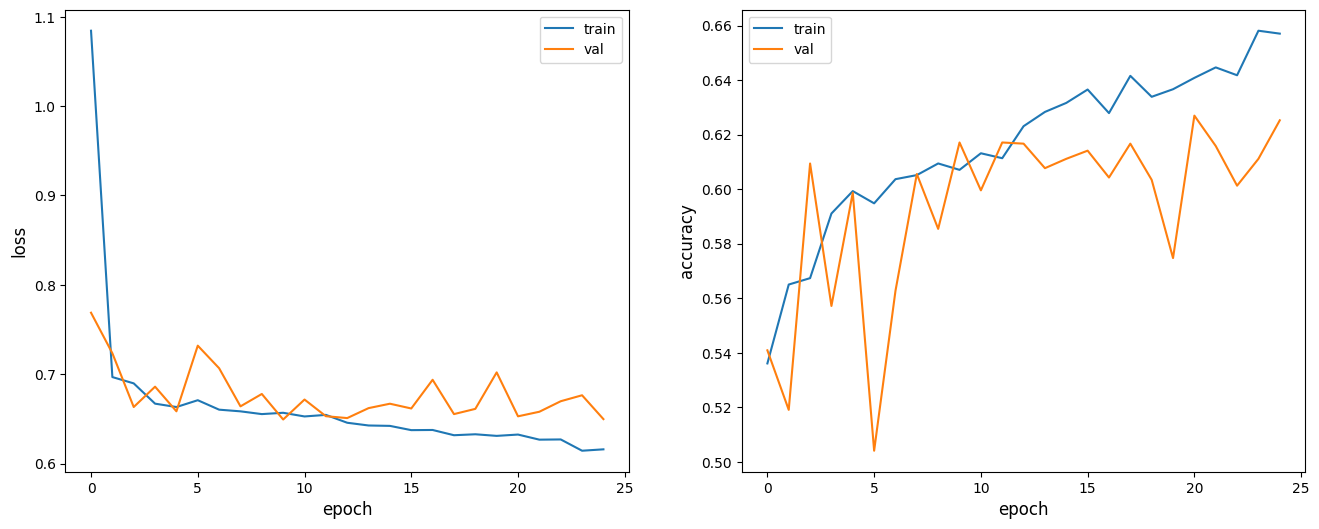

In [46]:
ff.performance_plot(history)

It seems to overfit after the epoch number 11/12.

Let's modify the learning rate!

In [15]:
model = Sequential(
    [
        
        Flatten(input_shape=(img_size, img_size, 1)),
        Dense(1000, activation="relu"),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.compile(
    optimizer=Adam(learning_rate=0.000001),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [16]:
history = model.fit(train, validation_data=valid, epochs=20, learning_rate=0.000001)

Epoch 1/20
223/223 [==============================] - 53s 228ms/step - loss: 0.6887 - accuracy: 0.5520 - val_loss: 0.6769 - val_accuracy: 0.5849
Epoch 2/20
223/223 [==============================] - 53s 238ms/step - loss: 0.6725 - accuracy: 0.5848 - val_loss: 0.6694 - val_accuracy: 0.5827
Epoch 3/20
223/223 [==============================] - 53s 234ms/step - loss: 0.6631 - accuracy: 0.6033 - val_loss: 0.6628 - val_accuracy: 0.6004
Epoch 4/20
223/223 [==============================] - 57s 256ms/step - loss: 0.6562 - accuracy: 0.6135 - val_loss: 0.6588 - val_accuracy: 0.6107
Epoch 5/20
223/223 [==============================] - 50s 223ms/step - loss: 0.6507 - accuracy: 0.6172 - val_loss: 0.6569 - val_accuracy: 0.6088
Epoch 6/20
223/223 [==============================] - 52s 232ms/step - loss: 0.6449 - accuracy: 0.6277 - val_loss: 0.6541 - val_accuracy: 0.6105
Epoch 7/20
223/223 [==============================] - 62s 279ms/step - loss: 0.6414 - accuracy: 0.6337 - val_loss: 0.6530 - val_ac

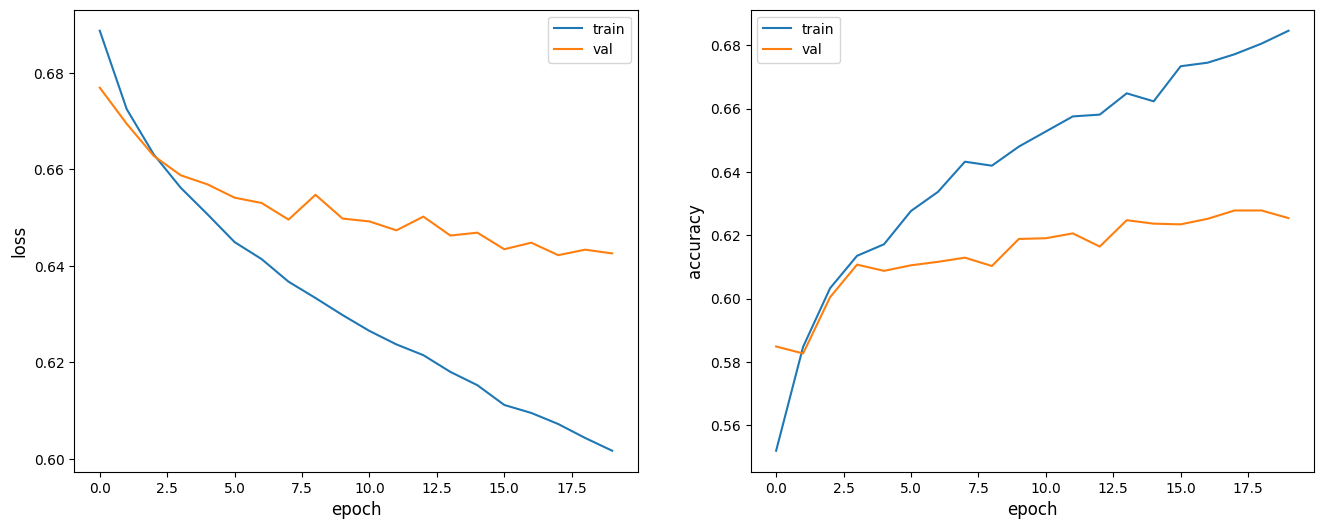

In [17]:
ff.performance_plot(history)

With a very lower learning rate the neural network reach the optimal performance faster and the learning curve is more smooth.

We can deduce that with the default learning rate there were a lot of oscillations, so with a learning rate = 0.000001 we obtain a better exploitation!

#### Risk estimation

In [9]:
def_model= Sequential(
    [
        Flatten(input_shape=(img_size, img_size, 1)),
        Dense(100, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)

In [10]:
ff.five_fold_cross_validation(def_model,test,no_epochs=3,learning_rate=0.000001)

----------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/3
292/292 [==============================] - 3s 10ms/step - loss: 0.7132 - accuracy: 0.5308
Epoch 2/3
292/292 [==============================] - 3s 9ms/step - loss: 0.6966 - accuracy: 0.5582
Epoch 3/3
292/292 [==============================] - 3s 9ms/step - loss: 0.6878 - accuracy: 0.5445
Score for fold 1: loss of 0.6837781667709351; accuracy of 0.5405405163764954
----------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/3
293/293 [==============================] - 3s 9ms/step - loss: 0.6854 - accuracy: 0.5734
Epoch 2/3
293/293 [==============================] - 3s 10ms/step - loss: 0.6766 - accuracy: 0.5529
Epoch 3/3
293/293 [==============================] - 3s 9ms/step - loss: 0.6693 - accuracy: 0.6109
Score for fold 2: loss of 0.6568224430084229; accuracy of 0.6027397513389587
------------------------------------------------------------

### Many neurons model

#### Model definition

Try to double the hidden neurons per layers.

In [17]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape=(img_size, img_size, 1)),
        Dense(2000, activation="relu"),
        Dense(200, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 2000)              32770000  
                                                                 
 dense_7 (Dense)             (None, 200)               400200    
                                                                 
 dense_8 (Dense)             (None, 2)                 402       
                                                                 
Total params: 33,170,602
Trainable params: 33,170,602
Non-trainable params: 0
_________________________________________________________________


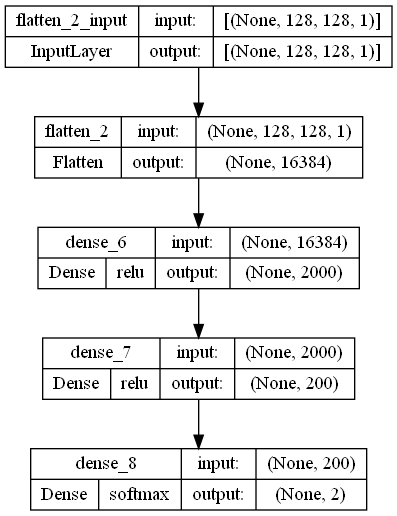

In [18]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [19]:
model.compile(
    optimizer=Adam(learning_rate=0.000001),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Hyperparameters tuning

In [20]:
history = model.fit(train, validation_data=valid, epochs=12)


Epoch 1/12
223/223 [==============================] - 68s 302ms/step - loss: 0.6872 - accuracy: 0.5538 - val_loss: 0.6746 - val_accuracy: 0.5803
Epoch 2/12
223/223 [==============================] - 70s 313ms/step - loss: 0.6640 - accuracy: 0.5954 - val_loss: 0.6678 - val_accuracy: 0.5961
Epoch 3/12
223/223 [==============================] - 64s 284ms/step - loss: 0.6528 - accuracy: 0.6121 - val_loss: 0.6697 - val_accuracy: 0.5920
Epoch 4/12
223/223 [==============================] - 67s 300ms/step - loss: 0.6440 - accuracy: 0.6286 - val_loss: 0.6737 - val_accuracy: 0.5902
Epoch 5/12
223/223 [==============================] - 69s 308ms/step - loss: 0.6382 - accuracy: 0.6288 - val_loss: 0.6593 - val_accuracy: 0.6069
Epoch 6/12
223/223 [==============================] - 65s 291ms/step - loss: 0.6311 - accuracy: 0.6406 - val_loss: 0.6621 - val_accuracy: 0.6016
Epoch 7/12
223/223 [==============================] - 71s 318ms/step - loss: 0.6239 - accuracy: 0.6544 - val_loss: 0.6569 - val_ac

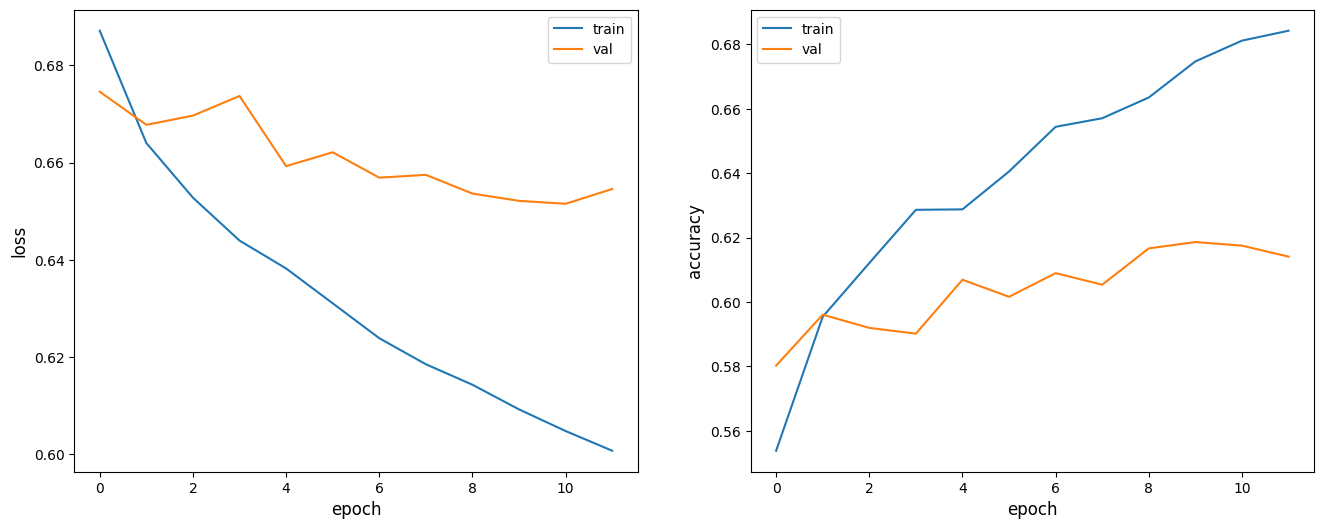

In [21]:
ff.performance_plot(history)

#### Risk estimation

In [22]:
ff.five_fold_cross_validation(model,test,no_epochs=2,learning_rate=0.000001)

----------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/2
292/292 [==============================] - 45s 151ms/step - loss: 0.7653 - accuracy: 0.5171
Epoch 2/2
292/292 [==============================] - 46s 156ms/step - loss: 0.6860 - accuracy: 0.5548
Score for fold 1: loss of 0.7683595418930054; accuracy of 0.44594594836235046
----------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/2
293/293 [==============================] - 47s 159ms/step - loss: 0.6768 - accuracy: 0.5904
Epoch 2/2
293/293 [==============================] - 41s 141ms/step - loss: 0.6360 - accuracy: 0.6587
Score for fold 2: loss of 0.664784848690033; accuracy of 0.5479452013969421
----------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/2
293/293 [==============================] - 38s 126ms/step - loss: 0.6407 - accuracy: 0.6143
Epoch 2/2
293/293 [==============================] 

### Many layers model

#### Model definition

In [27]:
model = Sequential(
    [
        Flatten(input_shape=(img_size, img_size, 1)),
        Dense(750, activation="relu"),
        Dense(250, activation="relu"),
        Dense(75, activation="relu"),
        Dense(25, activation="relu"),
        Dense(2, activation="softmax"),
    ]
)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_5 (Dense)             (None, 750)               12288750  
                                                                 
 dense_6 (Dense)             (None, 250)               187750    
                                                                 
 dense_7 (Dense)             (None, 75)                18825     
                                                                 
 dense_8 (Dense)             (None, 25)                1900      
                                                                 
 dense_9 (Dense)             (None, 2)                 52        
                                                                 
Total params: 12,497,277
Trainable params: 12,497,277


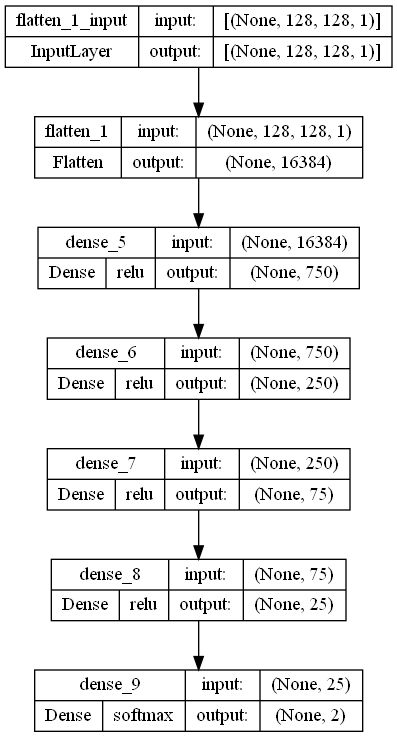

In [28]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


In [29]:
model.compile(
    optimizer=Adam(learning_rate=0.000001),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)


#### Hyperparameter tuning

In [32]:
history = model.fit(train, validation_data=valid, epochs=12)


Epoch 1/12
223/223 [==============================] - 28s 126ms/step - loss: 0.6335 - accuracy: 0.6481 - val_loss: 0.6491 - val_accuracy: 0.6210
Epoch 2/12
223/223 [==============================] - 31s 139ms/step - loss: 0.6314 - accuracy: 0.6473 - val_loss: 0.6491 - val_accuracy: 0.6197
Epoch 3/12
223/223 [==============================] - 28s 125ms/step - loss: 0.6286 - accuracy: 0.6541 - val_loss: 0.6488 - val_accuracy: 0.6212
Epoch 4/12
223/223 [==============================] - 28s 125ms/step - loss: 0.6266 - accuracy: 0.6555 - val_loss: 0.6474 - val_accuracy: 0.6226
Epoch 5/12
223/223 [==============================] - 29s 128ms/step - loss: 0.6240 - accuracy: 0.6571 - val_loss: 0.6458 - val_accuracy: 0.6212
Epoch 6/12
223/223 [==============================] - 29s 129ms/step - loss: 0.6218 - accuracy: 0.6603 - val_loss: 0.6460 - val_accuracy: 0.6254
Epoch 7/12
223/223 [==============================] - 31s 136ms/step - loss: 0.6203 - accuracy: 0.6627 - val_loss: 0.6442 - val_ac

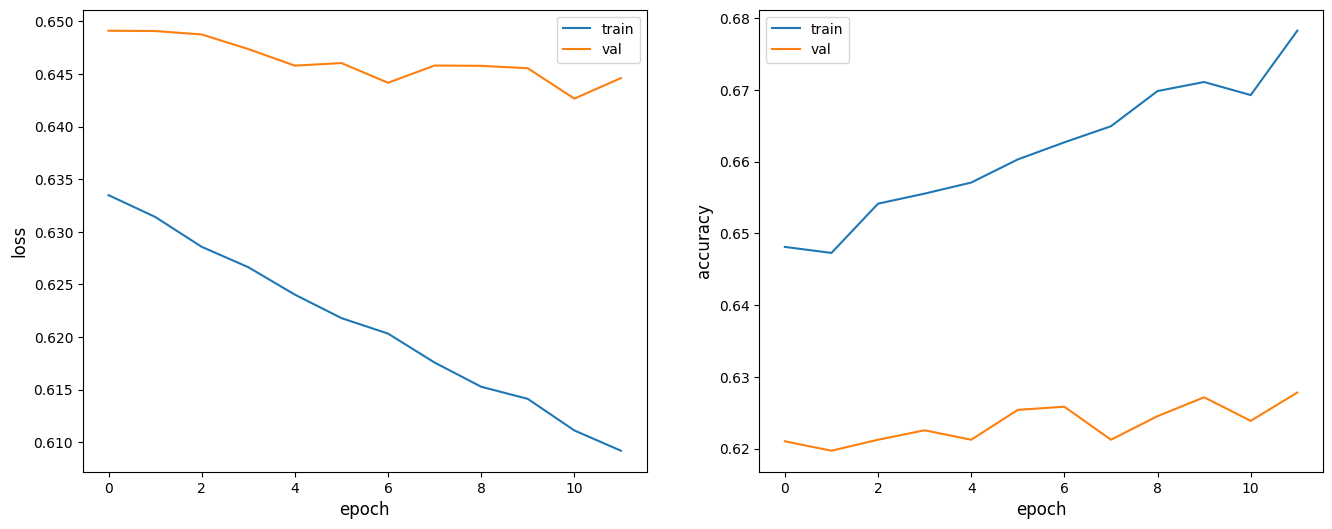

In [33]:
ff.performance_plot(history)

#### Risk estimation

In [34]:
ff.five_fold_cross_validation(model,test,no_epochs=3,learning_rate=0.000001)

----------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/3
292/292 [==============================] - 17s 56ms/step - loss: 0.7274 - accuracy: 0.5514
Epoch 2/3
292/292 [==============================] - 16s 56ms/step - loss: 0.6827 - accuracy: 0.5616
Epoch 3/3
292/292 [==============================] - 16s 54ms/step - loss: 0.6589 - accuracy: 0.6233
Score for fold 1: loss of 0.6900889277458191; accuracy of 0.5675675868988037
----------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/3
293/293 [==============================] - 16s 53ms/step - loss: 0.6518 - accuracy: 0.6485
Epoch 2/3
293/293 [==============================] - 15s 53ms/step - loss: 0.6321 - accuracy: 0.6416
Epoch 3/3
293/293 [==============================] - 18s 62ms/step - loss: 0.6140 - accuracy: 0.6689
Score for fold 2: loss of 0.6513684988021851; accuracy of 0.6301369667053223
--------------------------------------------------